## K-Means

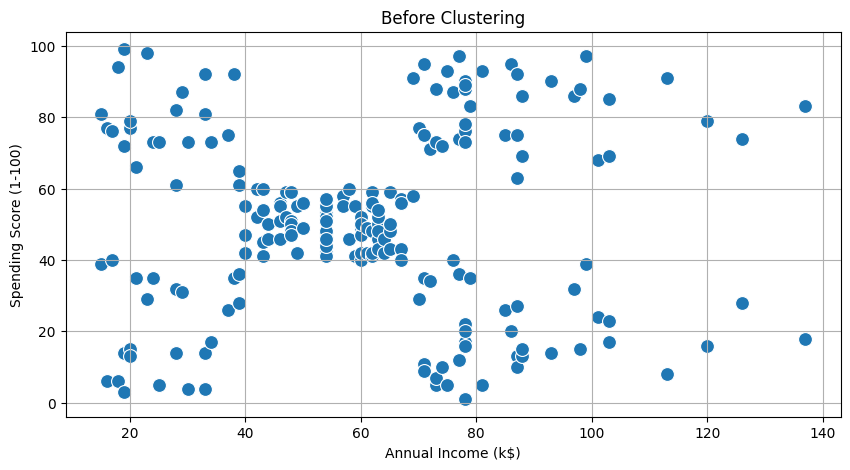

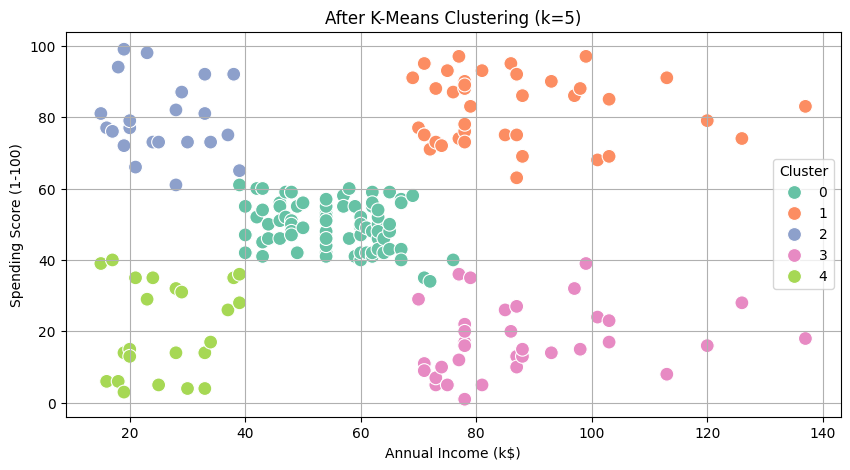

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Mall_Customers (1).csv")

# Select the two features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Plot BEFORE clustering
plt.figure(figsize=(10, 5))
plt.title("Before Clustering")
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

# 🧠 Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 🎨 Plot AFTER clustering
plt.figure(figsize=(10, 5))
plt.title("After K-Means Clustering (k=5)")
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


## DB-SCAN

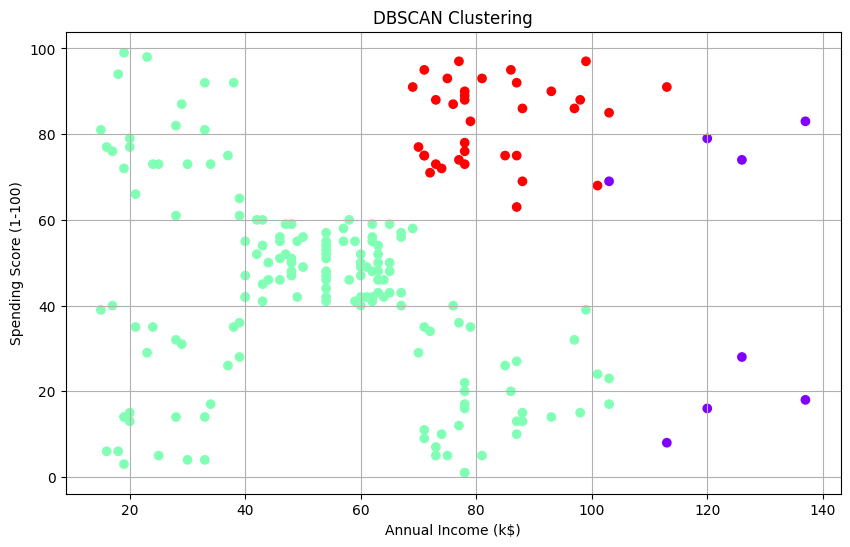

Number of clusters found: 2
Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
df = pd.read_csv("/content/Mall_Customers (1).csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tweak eps and min_samples
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# Print number of clusters (excluding noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters found: {n_clusters}")
print(df['Cluster'].value_counts())


## Agglomerative Clustering

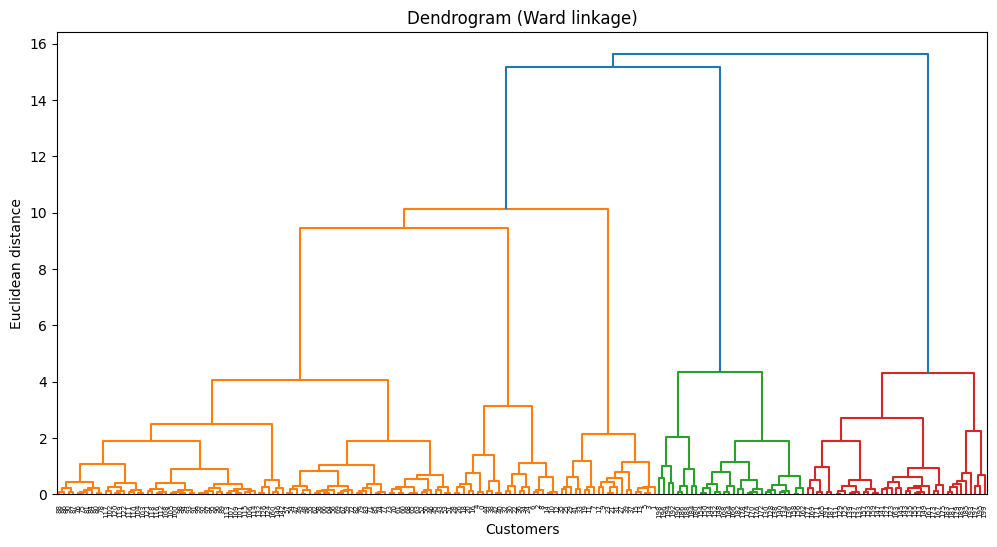

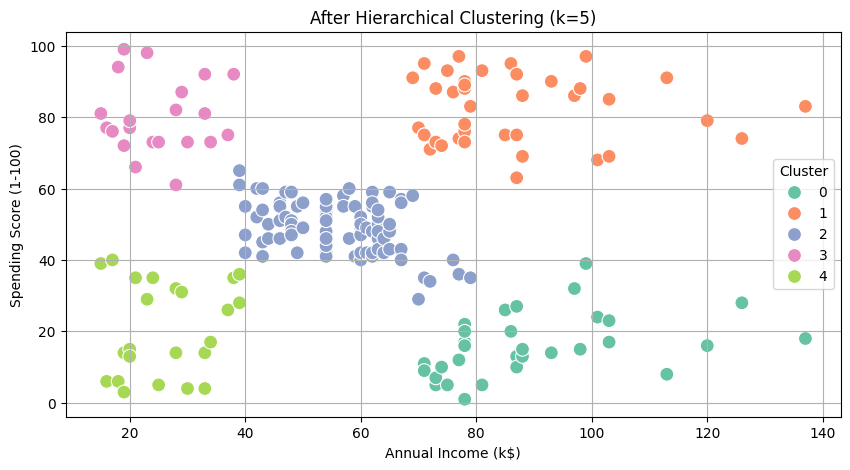

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv("Mall_Customers (1).csv")

# Select the two features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 🔗 Optional: Plot dendrogram for hierarchical structure
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

# 🧠 Apply Hierarchical Clustering with 5 clusters
hier_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = hier_cluster.fit_predict(X_scaled)

# 🎨 Plot AFTER hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title("After Hierarchical Clustering (k=5)")
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
data = pd.read_csv("generated_dataset.csv")

# Step 2: Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Step 4: Save PCA-transformed data
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df.to_csv("pca_transformed.csv", index=False)

# Optional: Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
data

Explained Variance Ratio: [0.60725012 0.22785852]


,PC1,PC2
0,1.399063,-1.538958
1,0.148359,-0.884791
2,1.360825,0.832245
3,2.959627,1.075364
4,-0.349435,-0.445767
...,...,...
95,-2.541711,-0.564627
96,1.212576,-1.900935
97,0.507816,1.012383
98,0.427965,-0.661492
